In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [37]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [64]:
df = df[['YearsExperience','Salary']].copy()
df.info()
df['Salary'] = df['Salary'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int32  
dtypes: float64(1), int32(1)
memory usage: 492.0 bytes


In [107]:
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

q0 = 0
q1 = 0
alpha = 0.05
def predict(q0,q1,x):
    return q0+q1*x
def er(pv, av):
    return pv-av

def gd(q0,q1,alpha,epoches,x,y):
    m = len(x)
    for i in range(epoches): 
        q0 = q0 - alpha * (1/m) * np.sum(er(predict(q0,q1,x),y)*1)
        q1 = q1 - alpha * (1/m) * np.sum(er(predict(q0,q1,x),y)*x)
    return q0,q1

q0,q1 = gd(q0,q1,alpha,1100,x,y)
print(q0,q1)
        

24848.036099750636 9449.986700878091


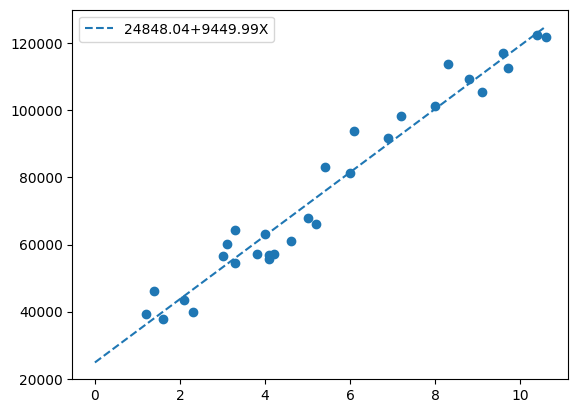

In [108]:
plt.scatter(x,y)

# optimal 24848.203966522262 9449.962321455214

xl = np.linspace(0,max(x),100)
yl = round(q0,2)+round(q1,2)*xl
plt.plot(xl,yl,label = f'{round(q0,2)}+{round(q1,2)}X', linestyle = '--')
plt.legend()
plt.show()